## Dataset Information

### Import libraries


In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import random


### Dataset Information

In [2]:
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

print('Number of positive tweets:',len(all_positive_tweets))
print('Number of negative tweets:',len(all_negative_tweets))
# print('\nThe type of all_positive_tweets is:',type(all_positive_tweets))
# print('The type of a tweet entry is:',type(all_positive_tweets[0]))

tweets = all_positive_tweets + all_negative_tweets
print("The length of tweets is",len(tweets))

# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Number of positive tweets: 5000
Number of negative tweets: 5000
The length of tweets is 10000


In [3]:
# Example positive and negative tweets
random.seed(0)

print("\033[92m"+all_positive_tweets[random.randint(0,5000)])
print("\033[91m"+all_negative_tweets[random.randint(0,5000)])

#openfollow for rp who can speak eng. just retweet :)
@Jaysdaughter13 come over again :(


#### Visulization of Sentiment Distribution of Tweets.

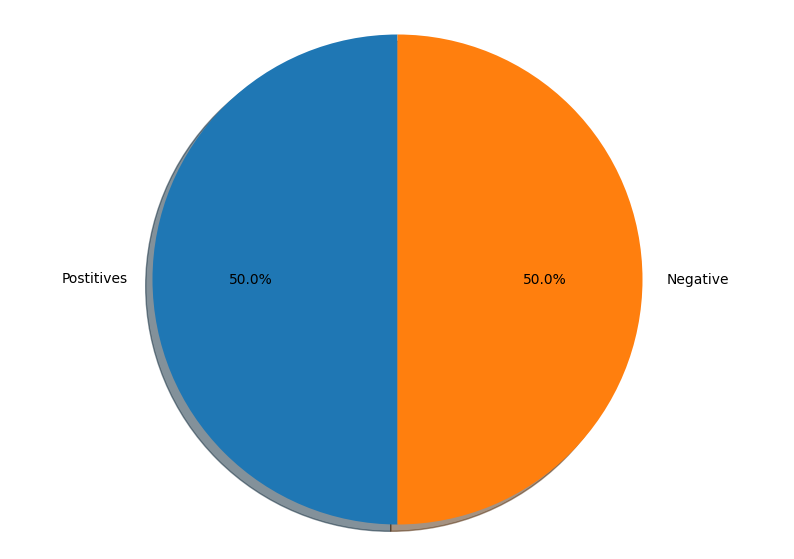

In [4]:
fig = plt.figure(figsize=(10,7))
sizes = [len(all_positive_tweets),len(all_negative_tweets)]
label = ['Postitives','Negative']
plt.pie(sizes,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project which includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [5]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Removing certain patterns using regex

Remove hyperlinks, Twitter marks and styles

In [6]:
tweet = all_positive_tweets[2277]

print('\033[92m'+ tweet)
print('\033[94m')

# remove stock market tickers like $GE
tweet2 = re.sub(r'\$\w*', '', tweet)

# remove old style retweet text "RT"
tweet2 =re.sub(r'^RT[\s]+','',tweet2)

# remove hyperlinks
tweet2 =re.sub(r'https?:\/\/.*[\r\n]*','',tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 =re.sub(r'#','',tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenizing strings using TweetTokenizer

In [7]:
print('\033[92m'+tweet2)
print('\033[94m')
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Removing stopwords and punctuations

In [8]:
stop_words = stopwords.words('english')

print(f'stopwords_english: {stop_words}')
print(f'\nPunctuations: {string.punctuation} \n')

tweets_clean = [word for word in tweet_tokens if word.lower() not in stopwords.words('english') and word not in string.punctuation]

print("\033[92m", tweet_tokens)
print('\033[94m', tweets_clean)

stopwords_english: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

### Stemming using portstemmer

In [9]:
stemmer = PorterStemmer()
tweets_stem = [stemmer.stem(word) for word in tweets_clean]
print(tweets_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### Preprocessing tweet function

In [10]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)


    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

### Word frequency dictionary function

In [11]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [12]:
# create frequency dictionary
freqs = build_freqs(tweets , labels)
print('\033[92m',freqs)

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

 {('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3568, ('hey', 1.0): 76, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 97, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 620, ('listen', 1.0): 16, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 129, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 400, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long'

In [13]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

### Visualizing word frequencies

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


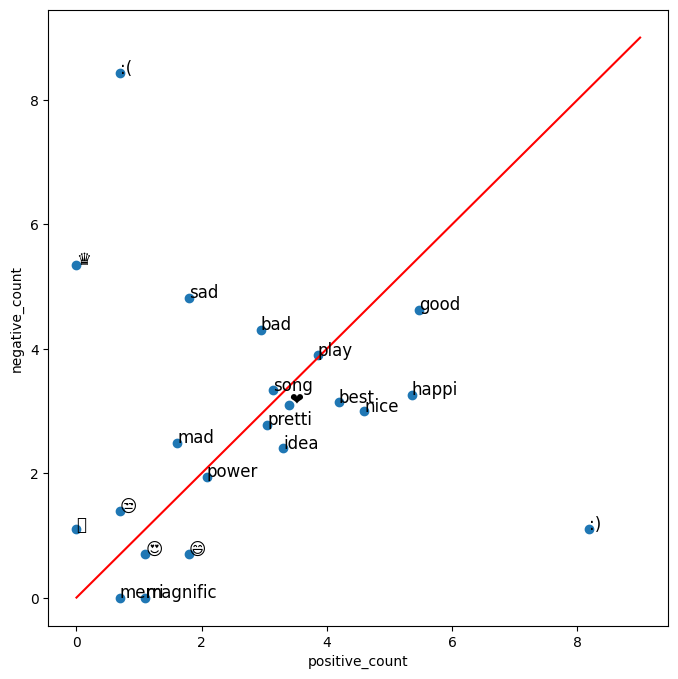

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))
x = np.log([x[1]+1 for x in data]) ##for positive data
y = np.log([x[2]+1 for x in data]) ## for negative data
ax.scatter(x,y)
plt.xlabel('positive_count')
plt.ylabel('negative_count')

# Add the word as the label at the same position as you added the points just before
for i in range(len(data)):
  ax.annotate(data[i][0],(x[i],y[i]), fontsize = 12)
ax.plot([0,9],[0,9],color = "red")

### Splitting dataset into train and test set

In [15]:
train_pos  = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]
test_pos = all_positive_tweets[4000:]
test_neg = all_negative_tweets[4000:]
train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [16]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [17]:
print("train_y.shape =",train_y.shape)
print("test_y.shape =",test_y.shape)

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [18]:
freqs = build_freqs(train_x, train_y)

In [19]:
print("This is an example of positive tweets:\n",train_x[0])
print("\nThis is an example of processed tweets:\n",process_tweet(train_x[0]))

This is an example of positive tweets:
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of processed tweets:
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


## Extracting Features

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet.
* Then train your classifier on these features.
* Test the classifier on a validation set

In [20]:
def extract_features(tweet,freqs):
  word_l = process_tweet(tweet)
  x = np.zeros((1,3))
  x[0,0] = 1
  for word in word_l:
    x[0,1] += freqs.get((word,1.0),0)
    x[0,2] += freqs.get((word,0.0),0)
  assert(x.shape == (1,3))
  return x

In [21]:
tmp1 = extract_features(train_x[0],freqs)
tmp1

array([[1.00e+00, 3.02e+03, 6.10e+01]])

In [22]:
X = np.zeros((len(train_x),3))
for i in range(len(train_x)):
  X[i] = extract_features(train_x[i],freqs)

Y = train_y

## Logistic Regression

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Logistic function
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

#### Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0.
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0.
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


#### Gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\
\theta_2
\\
\vdots
\\
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1)
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [23]:
def sigmoid(z):
  h = 1/(1+np.exp(-z))
  return h

In [24]:
def gradientDescent(x,y,theta,alpha,num_iters):
  m = x.shape[0]
  for i in range(0,num_iters):
    z = np.dot(x,theta)
    h = sigmoid(z)
    J = (-1/m)*(np.dot(y.transpose(),np.log(h))+np.dot((1-y).transpose(),np.log(1-h)))
    theta = theta - (alpha/m)*(np.dot(x.transpose(),(h-y)))
  J = float(J)
  return J,theta

## Training Model

In [25]:
J,theta = gradientDescent(X,Y,np.zeros((3,1)),1e-9, 2000)
J,theta

<ipython-input-24-130f7613ae17>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


(0.21085573305379277,
 array([[ 9.81892446e-08],
        [ 6.21461187e-04],
        [-6.32983574e-04]]))

In [26]:
def predict_tweet(tweet, freqs, theta):
  x = extract_features(tweet,freqs)
  y_pred = sigmoid(np.dot(x,theta))

  return y_pred

In [27]:
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.85444075]])

## Testing Model

In [28]:
def test_logistic_regression(test_x,test_y,freqs,theta):
  y_hat = []
  for tweet in test_x:
    y_pred = predict_tweet(tweet,freqs,theta)
    if y_pred > 0.5:
      y_hat.append(1)
    else:
      y_hat.append(0)
  accuracy = (y_hat == np.squeeze(test_y)).sum()/len(test_x)
  return accuracy

In [29]:
accuracy = test_logistic_regression(test_x,test_y,freqs,theta)
print(accuracy)

0.9955


## Your Own Tweet

In [30]:
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else:
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.47901444]]
Negative sentiment


## Using SKLearn Library

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

train_pos  = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]
test_pos = all_positive_tweets[4000:]
test_neg = all_negative_tweets[4000:]
train_x = train_pos + train_neg
test_x = test_pos + test_neg

# Extract features for training and testing data
X_train = np.array([extract_features(tweet, freqs) for tweet in train_x])
X_test = np.array([extract_features(tweet, freqs) for tweet in test_x])
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
train_y = train_y.ravel()
test_y = test_y.ravel()


In [32]:
# For logistic regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, train_y)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(test_y, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

# # For linear SVM
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, train_y)
# svm_predictions = svm_model.predict(X_test)
# svm_accuracy = accuracy_score(test_y, svm_predictions)
# print("Linear SVM Accuracy:", svm_accuracy)

Logistic Regression Accuracy: 0.9915


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, train_y)

# Predict the labels for the test set
rf_predictions = rf_model.predict(X_test)

# Calculate the accuracy of the predictions
rf_accuracy = accuracy_score(test_y, rf_predictions)

# Print the accuracy
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.994


In [40]:
import pickle
with open('rf_model.pickle', 'wb') as f:
  pickle.dump(rf_model, f)

In [34]:
# from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# p = precision_score(test_y, svm_predictions)
# r = recall_score(test_y, svm_predictions)
# f1 = f1_score(test_y, svm_predictions)

# print(p,r,f1)


In [35]:
# my_tweet = ':('

# my_tweet_features = extract_features(my_tweet,freqs)

# y_hat = logistic_model.predict(my_tweet_features)
# print(y_hat)
# if y_hat ==1:
#     print('Positive sentiment')
# else:
#     print('Negative sentiment')

In [36]:
# import pickle
# with open('svm_model.pickle', 'wb') as f:
#   pickle.dump(svm_model, f)


In [37]:
# my_tweet = 'He is good'
# my_tweet_features = extract_features(my_tweet,freqs)

# with open('svm_model.pickle', 'rb') as f:
#   svm_load = pickle.load(f)

# y_hat = svm_load.predict(my_tweet_features)
# print(y_hat)
# if y_hat == 1:
#     print('Positive sentiment')
# else:
#     print('Negative sentiment')

# LSTM

In [38]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
# from tensorflow.keras.preprocessing import sequence

# # Define model parameters
# max_features = 10000  # Maximum number of words in the vocabulary
# maxlen = 100  # Maximum length of input sequences

# # Pad sequences to make them of equal length
# X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
# X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# # Define the LSTM model
# model = Sequential()
# model.add(Embedding(max_features, 128, input_length=maxlen))
# model.add(SpatialDropout1D(0.2))  # Dropout layer to prevent overfitting
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Print the model summary
# print(model.summary())

# # Train the model
# batch_size = 32
# epochs = 5
# model.fit(X_train, train_y, validation_data=(X_test, test_y), epochs=epochs, batch_size=batch_size)